# Declaration of Originality

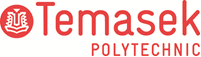

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that predicts an individual’s risk of stroke based on demographic and clinical attributes, in order to support early identification of high-risk patients and enable timely medical intervention.

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'stroke-data.csv'
df = pd.read_csv(FILE_PATH)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
## Check for missing data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

After checking for missing data. There is only 1 column that contains missing values (bmi). There is 201 number of missing rows in the bmi column. All other columns have 0 missing data. That means 201 ot of the 5110 records (around 3.9%) are missing BMI data

In [6]:
## Describe data distribution
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


**Breakdown of data distribution**

Age shows a wide and realistic distribution, with stroke typically increasing in the older age groups. This supports age as a key predictive feature. Secongly, Hypertension and heart disease are relatively infrequent in this dataset, when compared to global adult prevelance it is under represented, as global averages are around 30% while my only ~10% of my dataset has Hypertension or heart disease. Despite their lower frequency, both conditions are clinically significant risk factors for stroke and are therefore important predictors during modelling. Lastly, Several categorical features are dominated by a single category, which may influence model learning. Proper encoding will be required to ensure that the minority categories are not underrepresented during the model training.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [7]:
## Understanding distribution of target
col_y = 'stroke'

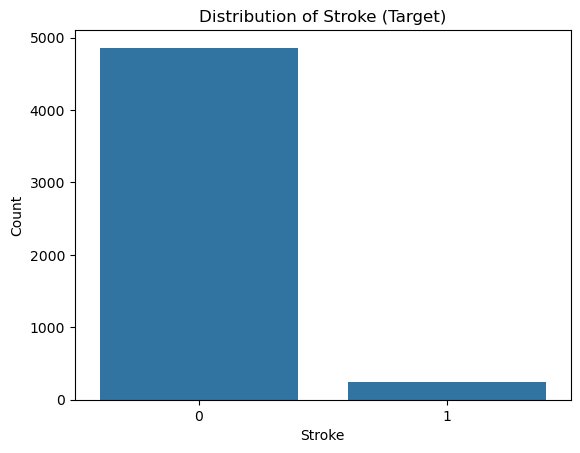

In [8]:
# Visualizing the distribution of the target variable (stroke)
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Target)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


The target variable is highly imbalanced, with stroke cases representing a small fraction of the dataset. This reflects real-world prevalence but introduces challenges for model evaluation. As a result, accuracy alone is insufficient, and greater emphasis is placed on recall and F1-score to ensure the model effectively identifies high-risk stroke patients.

### 2.3.1.2 Understanding distribution of features

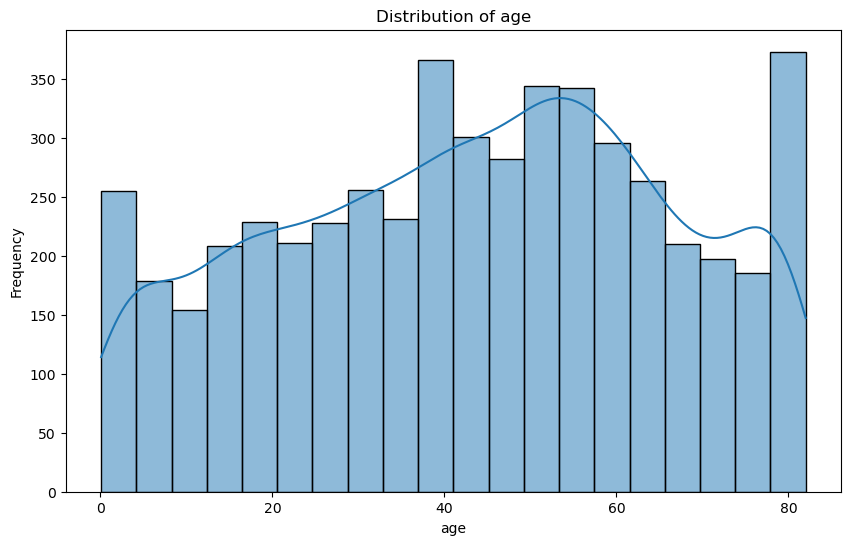

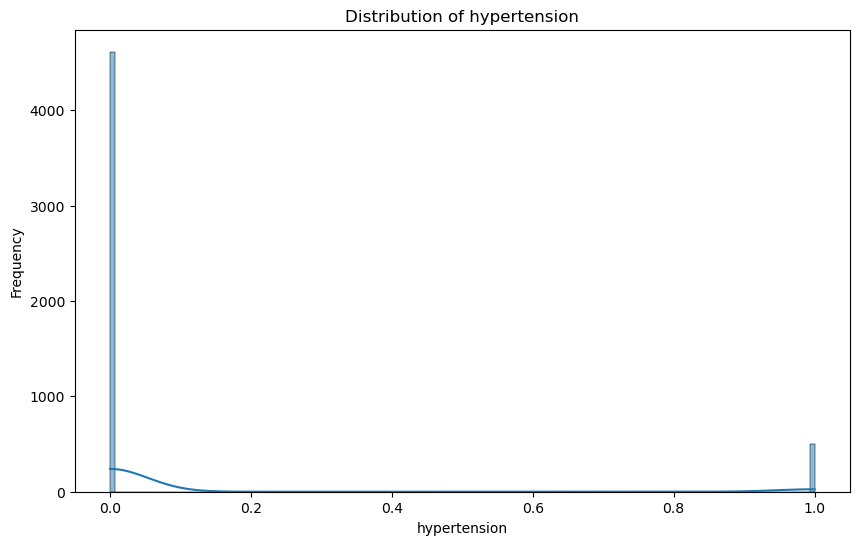

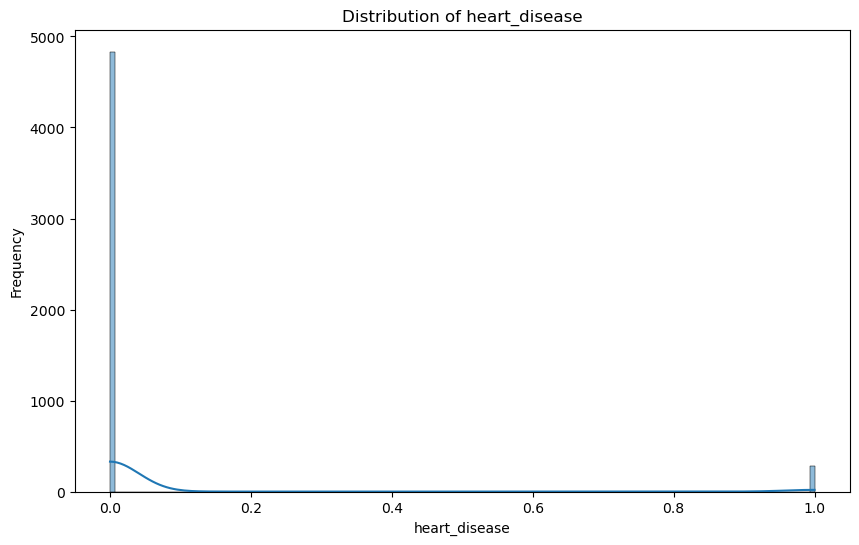

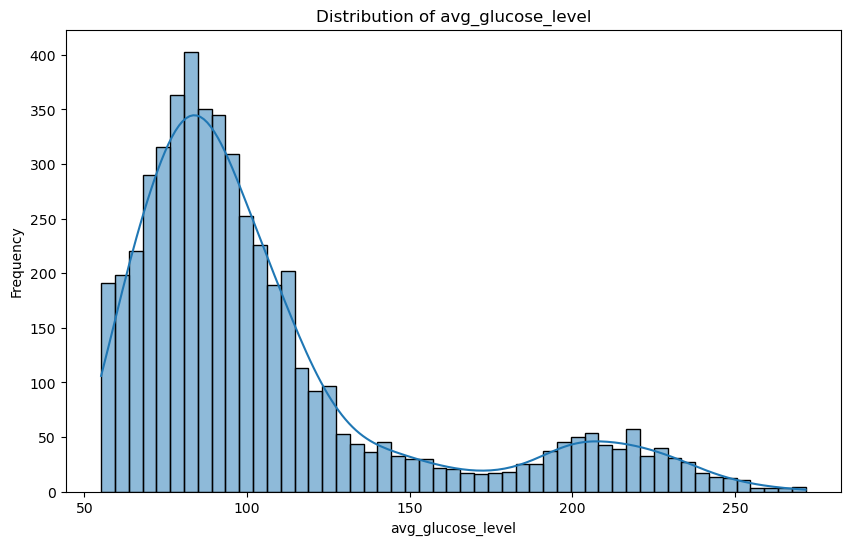

In [9]:
## Understanding distribution of features
# Visualizing the distribution of some numerical features (e.g., age, blood pressure)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### 2.3.2 Understanding relationship between variables

In [10]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns

df_corr = df[col_numeric].corr()
df_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


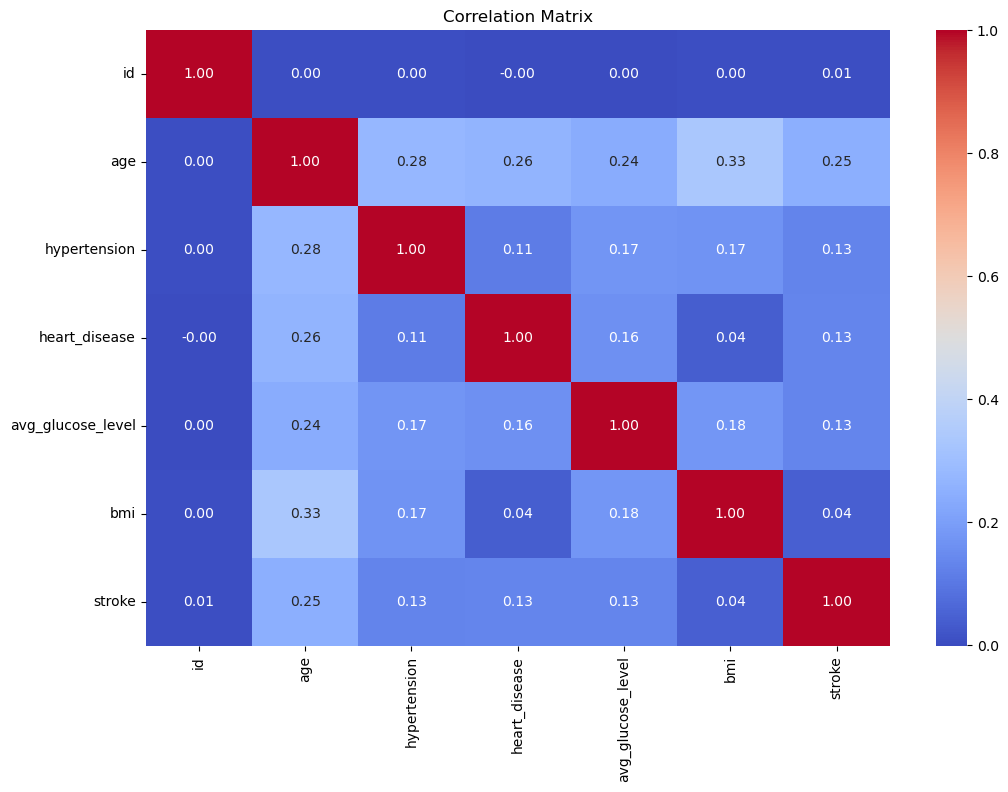

In [12]:
# Correlation matrix and heatmap
correlation_matrix = df[col_numeric].corr()  # Use only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection